# <font color = 'red'><b>K-Means Clustering</b></font>

##### <b>K-Means Clustering is the most widely used clustering algorithm because of its simplicity and efficiency. It aims to partition a dataset into `k` clusters where each data point belongs to cluster with the nearest mean. The goal is to group similar data points together and discover underlying patterns or structures within the data.</b>

##### <b>The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid.</b>

---

# <font color = 'red'><b>Implementing K-Means</b></font>

Let’s consider a simple real-life example: clustering customer data based on their annual income and spending score to understand customer segments for targeted marketing. 

In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# creating data with sklearn make_blobs
from sklearn.datasets import make_blobs

In [2]:
# Generating the data 
n_samples = 500 # number of samples
n_features = 2 # number of features
n_clusters = 5 # number of clusters
cluster_std = 1.0 # standard deviation of the clusters

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, cluster_std=cluster_std)

In [3]:
X.shape, y.shape

((500, 2), (500,))

In [4]:
df = pd.DataFrame(X, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
df.head()

,Annual Income (k$),Spending Score (1-100)
0,2.140166,-5.937791
1,4.998153,-7.153819
2,-2.056617,7.509188
3,-1.975972,7.559663
4,9.489705,-3.617178


In [5]:
# Applying KMeans to the dataset

k = 5
kmeans = KMeans(n_clusters=k) # instantiate the model
kmeans.fit(df)
df['clusters'] = kmeans.labels_ # add the clusters to the dataframe


In [6]:
df

,Annual Income (k$),Spending Score (1-100),clusters
0,2.140166,-5.937791,3
1,4.998153,-7.153819,3
2,-2.056617,7.509188,0
3,-1.975972,7.559663,0
4,9.489705,-3.617178,1
...,...,...,...
495,-1.427349,1.288633,2
496,-0.481899,7.171305,0
497,2.054822,-6.740050,3
498,-0.050540,1.701397,2


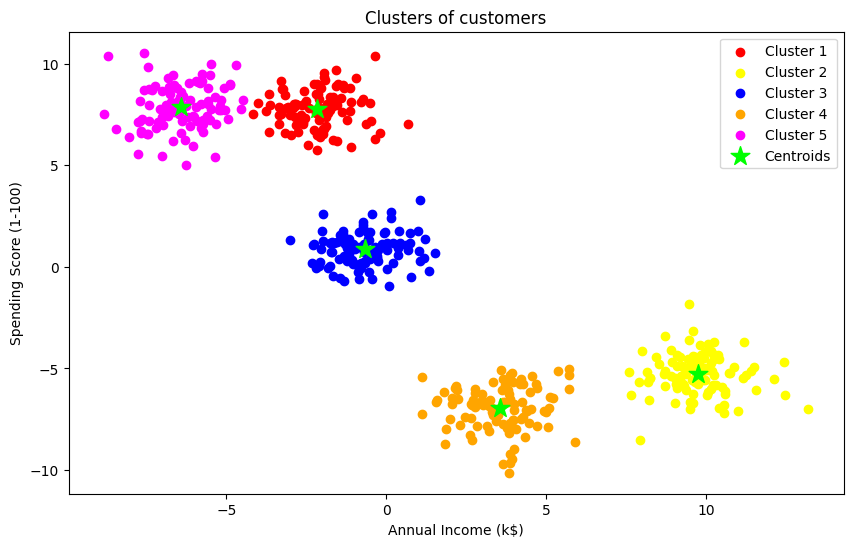

In [7]:
# Plotting the clusters

plt.figure(figsize=(10, 6))
colors = ['red', 'yellow', 'blue', 'orange', 'magenta']

for i in range(k):
    plt.scatter(df.loc[df['clusters'] == i, 'Annual Income (k$)'], 
                df.loc[df['clusters'] == i, 'Spending Score (1-100)'], 
                c=colors[i], label='Cluster ' + str(i+1))
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='lime', label='Centroids', marker='*')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

### <b>How to find Appropriate value of k</b>

Text(0, 0.5, 'Inertia')

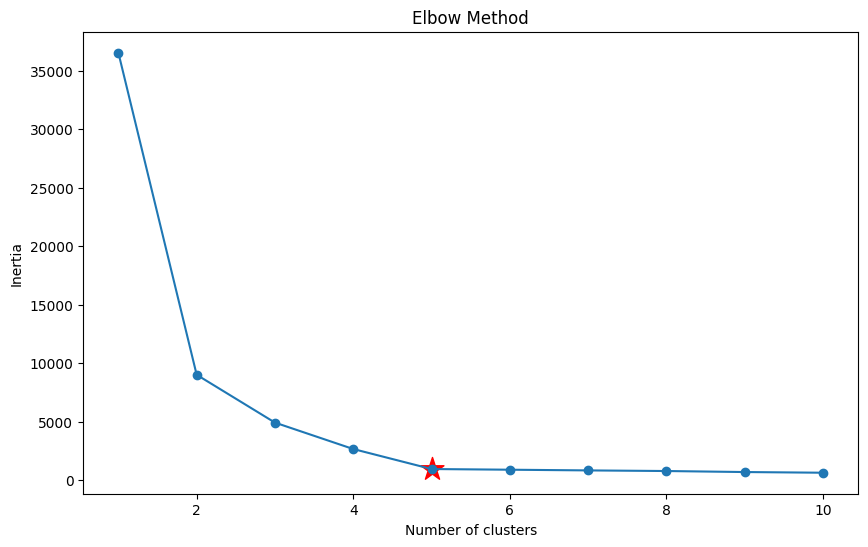

In [12]:
# Elbow Method

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.scatter(5, inertia[4], s=300, c='red', label='Optimal number of clusters', marker='*')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')